In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/')
print(os.getcwd())

/content/drive


In [4]:
import pandas as pd

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/Network security/UNSW_NB15_training_set.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Network security/UNSW_NB15_testing_set.csv')

In [6]:
df1 = df1.drop(columns=['id','label'])
df2 = df2.drop(columns=['id','label'])

In [7]:
cat_to_num = {'Normal': 0,
              'Backdoor': 1,
              'Analysis': 2,
              'Fuzzers': 3,
              'Shellcode': 4,
              'Reconnaissance': 5,
              'Exploits': 6,
              'DoS': 7,
              'Worms': 8,
              'Generic': 9
              }

In [8]:
df1['class'] = df1['attack_cat'].map(cat_to_num)
df2['class'] = df2['attack_cat'].map(cat_to_num)

In [9]:
df1 = df1.drop(columns=['attack_cat'])
df2 = df2.drop(columns=['attack_cat'])

In [10]:
categorical_columns = ['proto', 'service', 'state']

In [11]:
for column in categorical_columns:
    df1[f'{column}_target_encoded'] = df1.groupby(column)['class'].transform('mean')

In [12]:
for column in categorical_columns:
    df2[f'{column}_target_encoded'] = df2.groupby(column)['class'].transform('mean')

In [13]:
df1.drop(categorical_columns, axis=1, inplace=True)
df2.drop(categorical_columns, axis=1, inplace=True)

In [14]:
df1.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,class,proto_target_encoded,service_target_encoded,state_target_encoded
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,1,0,0,2.549296,3.011225,2.604497
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,6,0,0,2.549296,3.011225,2.604497
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,2,6,0,0,2.549296,3.011225,2.604497
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,0,2,1,0,0,2.549296,3.408110,2.604497
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,2,39,0,0,2.549296,3.011225,2.604497


In [15]:
df2.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,class,proto_target_encoded,service_target_encoded,state_target_encoded
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,0,1,2,0,0,6.051329,2.065531,6.496912
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,0,1,2,0,0,6.051329,2.065531,6.496912
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0,0,0,1,3,0,0,6.051329,2.065531,6.496912
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0,0,0,2,3,0,0,6.051329,2.065531,6.496912
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,0,0,0,2,3,0,0,6.051329,2.065531,6.496912


In [16]:
num_to_cat = {0: 'Normal',
              1: 'Backdoor',
              2: 'Analysis',
              3: 'Fuzzers',
              4: 'Shellcode',
              5: 'Reconnaissance',
              6: 'Exploits',
              7: 'DoS',
              8: 'Worms',
              9: 'Generic'
              }

In [17]:
df1['category'] = df1['class'].map(num_to_cat)
df2['category'] = df2['class'].map(num_to_cat)

In [18]:
df1 = df1.drop(columns=['class'])
df2 = df2.drop(columns=['class'])

In [19]:
df1.head()


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_target_encoded,service_target_encoded,state_target_encoded,category
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,1,0,2.549296,3.011225,2.604497,Normal
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,6,0,2.549296,3.011225,2.604497,Normal
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,2,6,0,2.549296,3.011225,2.604497,Normal
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,0,2,1,0,2.549296,3.408110,2.604497,Normal
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,2,39,0,2.549296,3.011225,2.604497,Normal


In [20]:
df2.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_target_encoded,service_target_encoded,state_target_encoded,category
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,0,1,2,0,6.051329,2.065531,6.496912,Normal
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,0,1,2,0,6.051329,2.065531,6.496912,Normal
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0,0,0,1,3,0,6.051329,2.065531,6.496912,Normal
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0,0,0,2,3,0,6.051329,2.065531,6.496912,Normal
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,0,0,0,2,3,0,6.051329,2.065531,6.496912,Normal


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [22]:
X_train = df1.drop(columns=['category'])
y_train = df1['category']

In [23]:
X_test = df2.drop(columns=['category'])
y_test = df2['category']

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_train_pred = rf_classifier.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9072435996144655


In [25]:
y_pred = rf_classifier.predict(X_test)

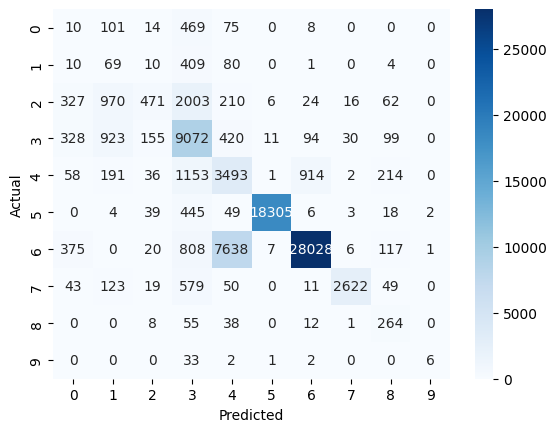

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# class_names = ['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode', 'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
#report = classification_report(y_test, y_pred, target_names=class_names)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Misclassification Rate: {misclassification_rate*100:.2f}%')

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.01      0.01      0.01       677
      Backdoor       0.03      0.12      0.05       583
           DoS       0.61      0.12      0.19      4089
      Exploits       0.60      0.81      0.69     11132
       Fuzzers       0.29      0.58      0.39      6062
       Generic       1.00      0.97      0.98     18871
        Normal       0.96      0.76      0.85     37000
Reconnaissance       0.98      0.75      0.85      3496
     Shellcode       0.32      0.70      0.44       378
         Worms       0.67      0.14      0.23        44

      accuracy                           0.76     82332
     macro avg       0.55      0.50      0.47     82332
  weighted avg       0.84      0.76      0.78     82332

Accuracy: 75.72%
Misclassification Rate: 24.28%


In [28]:
# Example of using class weights
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


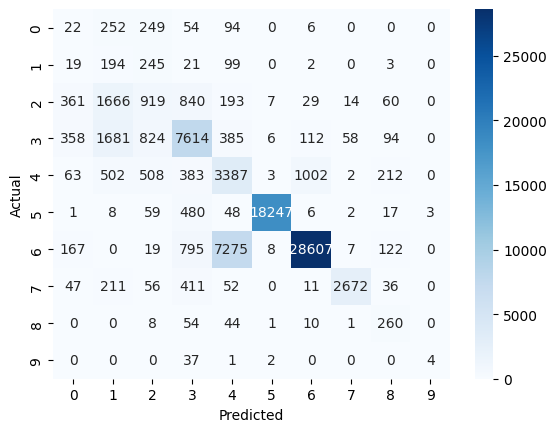

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Misclassification Rate: {misclassification_rate*100:.2f}%')

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.02      0.03      0.03       677
      Backdoor       0.04      0.33      0.08       583
           DoS       0.32      0.22      0.26      4089
      Exploits       0.71      0.68      0.70     11132
       Fuzzers       0.29      0.56      0.38      6062
       Generic       1.00      0.97      0.98     18871
        Normal       0.96      0.77      0.86     37000
Reconnaissance       0.97      0.76      0.85      3496
     Shellcode       0.32      0.69      0.44       378
         Worms       0.57      0.09      0.16        44

      accuracy                           0.75     82332
     macro avg       0.52      0.51      0.47     82332
  weighted avg       0.84      0.75      0.79     82332

Accuracy: 75.21%
Misclassification Rate: 24.79%


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']

# Initialize the RandomForestClassifier with the best hyperparameters
final_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)


final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [32]:
y_pred = final_model.predict(X_test)

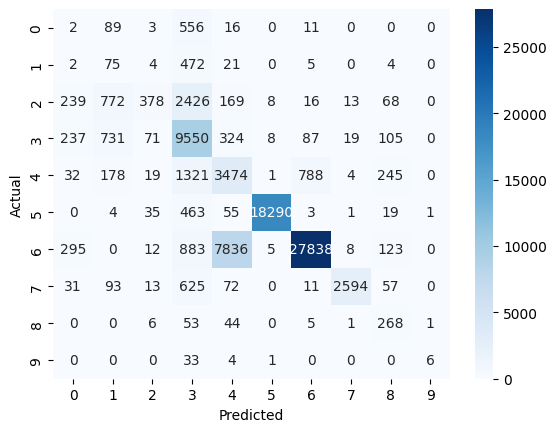

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Misclassification Rate: {misclassification_rate*100:.2f}%')

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.04      0.13      0.06       583
           DoS       0.70      0.09      0.16      4089
      Exploits       0.58      0.86      0.69     11132
       Fuzzers       0.29      0.57      0.38      6062
       Generic       1.00      0.97      0.98     18871
        Normal       0.97      0.75      0.85     37000
Reconnaissance       0.98      0.74      0.85      3496
     Shellcode       0.30      0.71      0.42       378
         Worms       0.75      0.14      0.23        44

      accuracy                           0.76     82332
     macro avg       0.56      0.50      0.46     82332
  weighted avg       0.84      0.76      0.77     82332

Accuracy: 75.88%
Misclassification Rate: 24.12%


In [ ]:
#from sklearn.svm import SVC

#svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')
#svm_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Misclassification Rate: {misclassification_rate*100:.2f}%')